In [2]:
import os

In [3]:
os.chdir("C:\\Users\\HP\\Desktop\\SCIT\\Learn Learn Learn\\Learn Python\\ML_Programmer_Hackathon")

In [4]:
os.getcwd()

'C:\\Users\\HP\\Desktop\\SCIT\\Learn Learn Learn\\Learn Python\\ML_Programmer_Hackathon'

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
train=pd.read_csv("train_HK6lq50.csv")

In [7]:
train.head()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y_1,Y,136,150,offline,intermediate,9389,M,Matriculation,3,24.0,5,N,1.0,0
1,16523_44,T_1,T,131,44,offline,easy,16523,F,High School Diploma,4,26.0,2,N,3.0,1
2,13987_178,Z_2,Z,120,178,online,easy,13987,M,Matriculation,1,40.0,1,N,2.0,1
3,13158_32,T_2,T,117,32,offline,easy,13158,F,Matriculation,3,NaN,4,N,1.0,1
4,10591_84,V_3,V,131,84,offline,intermediate,10591,F,High School Diploma,1,42.0,2,N,4.0,1


In [8]:
train.dtypes

id                            object
program_id                    object
program_type                  object
program_duration               int64
test_id                        int64
test_type                     object
difficulty_level              object
trainee_id                     int64
gender                        object
education                     object
city_tier                      int64
age                          float64
total_programs_enrolled        int64
is_handicapped                object
trainee_engagement_rating    float64
is_pass                        int64
dtype: object

In [9]:
train.difficulty_level.unique()

array(['intermediate', 'easy', 'hard', 'vary hard'], dtype=object)

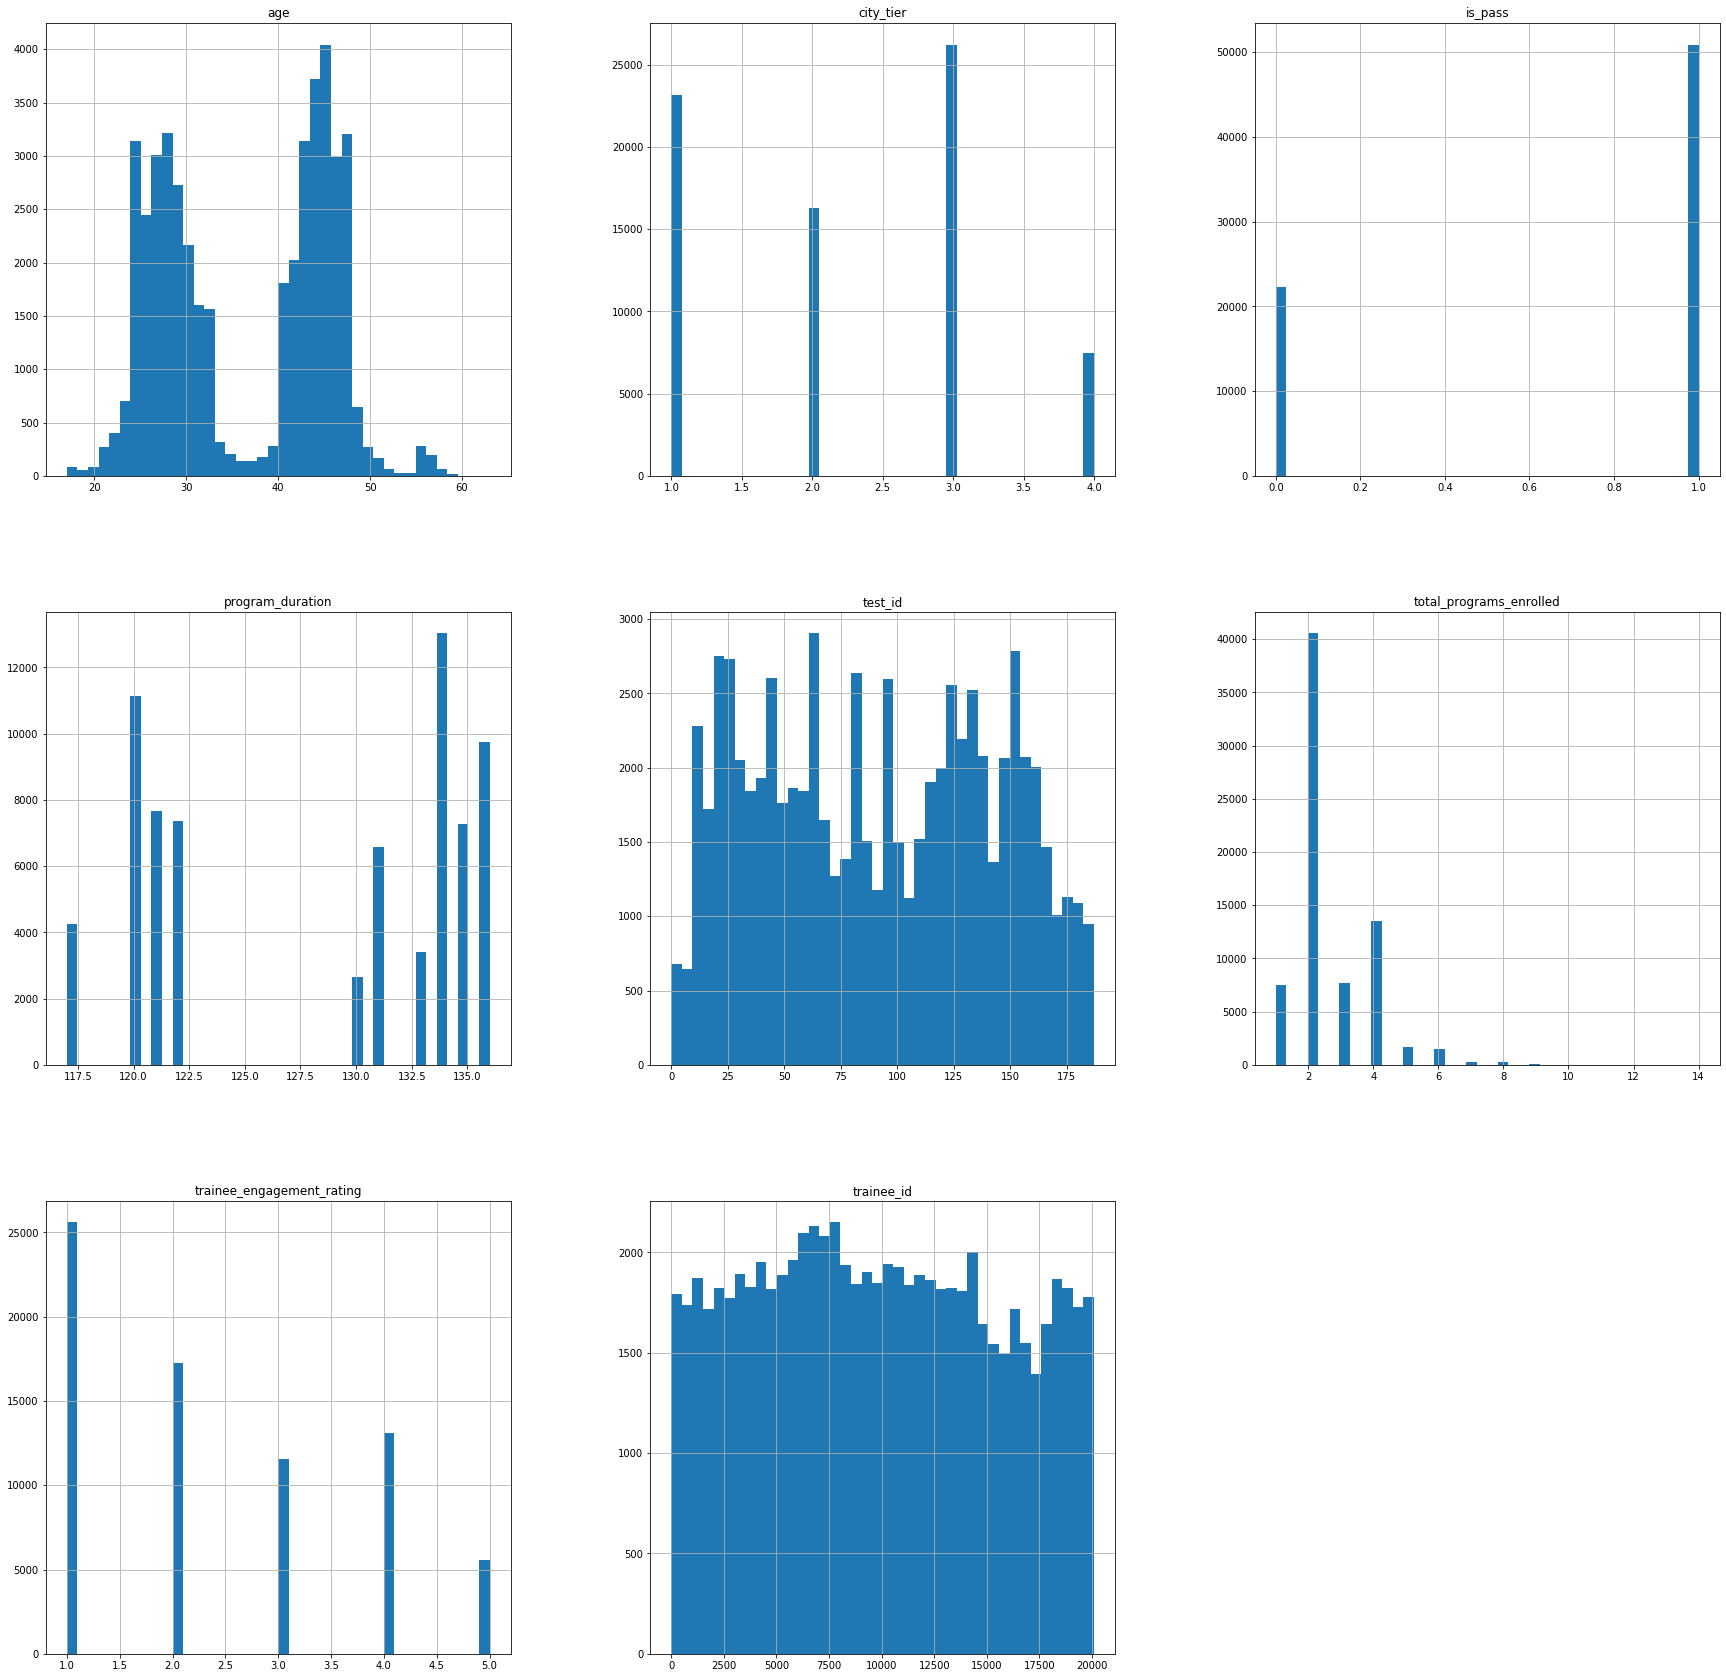

In [10]:
train.hist(figsize=(30,30),bins=40)
plt.show()

(6.0, 0.0)

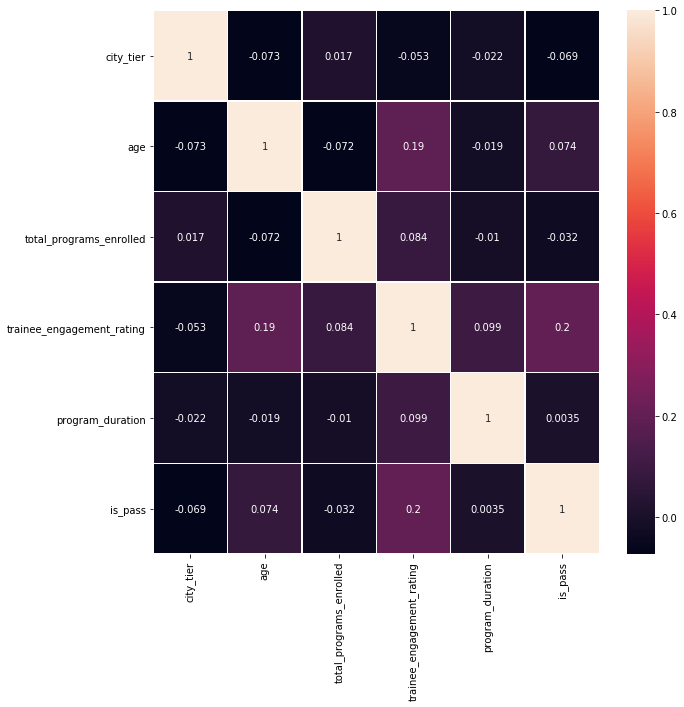

In [11]:
import seaborn as sns
corr_matrix=train[['city_tier','age','total_programs_enrolled','trainee_engagement_rating','program_duration','is_pass']].corr()
fig, ax = plt.subplots(figsize=(10,10))
ht=sns.heatmap(corr_matrix,annot=True,linewidths=0.5,ax=ax)
bottom,top=ht.get_ylim()
ht.set_ylim(bottom+0.5,top-0.5)


# Univariate Analysis

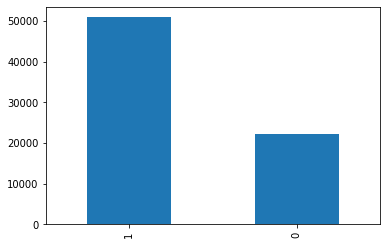

In [12]:
train['is_pass'].value_counts().plot.bar()

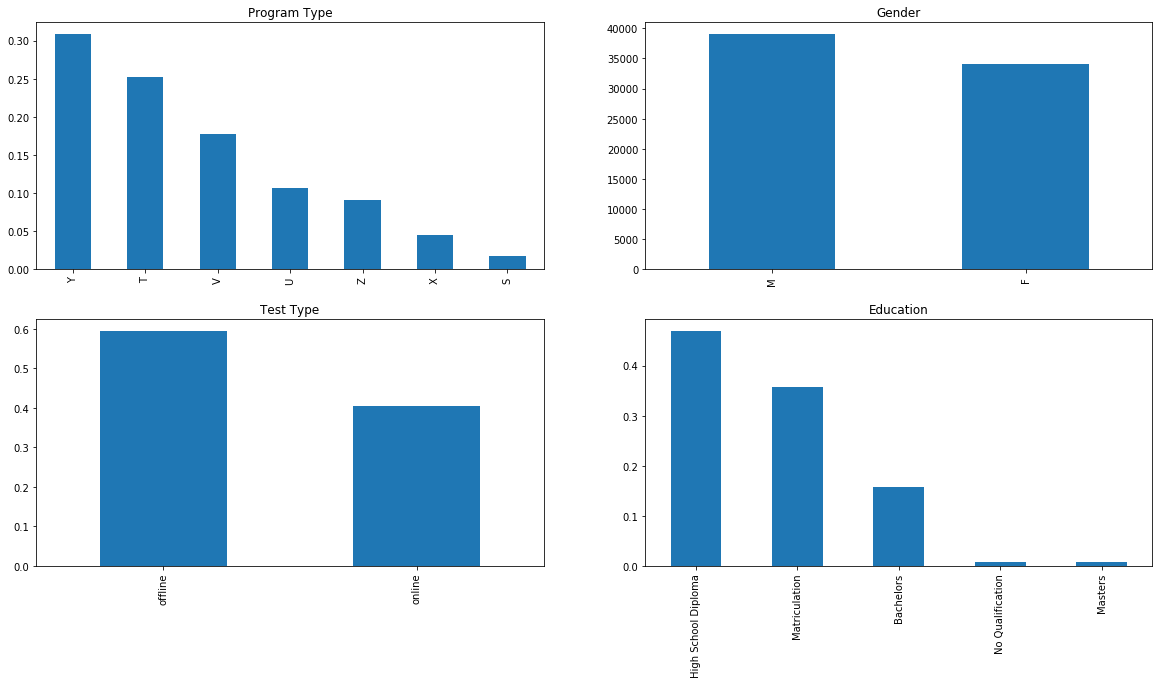

In [13]:
plt.figure(1)
plt.subplot(221)
train['program_type'].value_counts(normalize=True).plot.bar(figsize=(20,10),title="Program Type")
plt.subplot(222)
train['gender'].value_counts().plot.bar(figsize=(20,10),title="Gender")
plt.subplot(223)
train['test_type'].value_counts(normalize=True).plot.bar(figsize=(20,10),title="Test Type")
plt.subplot(224)
train['education'].value_counts(normalize=True).plot.bar(figsize=(20,10),title="Education")
plt.show()


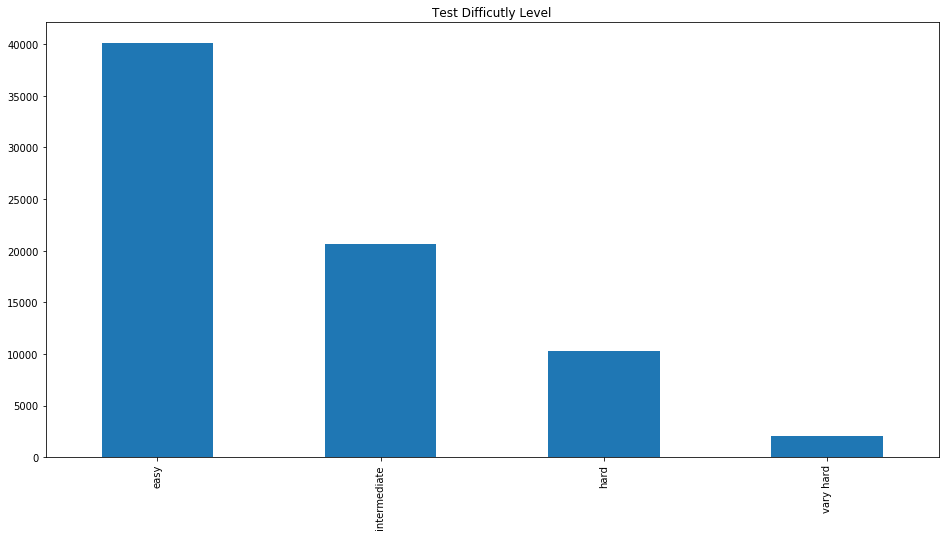

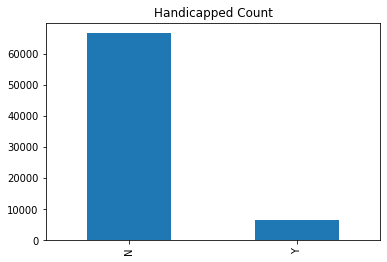

In [14]:

train['difficulty_level'].value_counts().plot.bar(figsize=(16,8),title="Test Difficutly Level")

plt.show()

train['is_handicapped'].value_counts().plot.bar(title="Handicapped Count")
plt.show()

# Bivariate Analysis

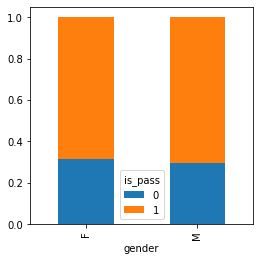

In [15]:
gender=pd.crosstab(train['gender'],train['is_pass'])
gender.div(gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

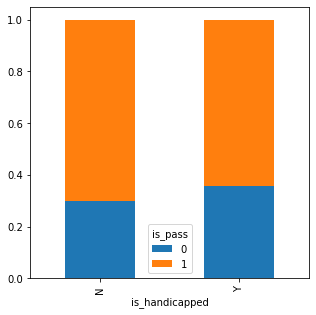

In [16]:
handicapped=pd.crosstab(train['is_handicapped'],train['is_pass'])
handicapped.div(handicapped.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(5,5))

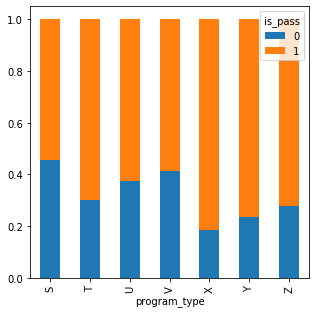

In [17]:
program_type=pd.crosstab(train['program_type'],train['is_pass'])
program_type.div(program_type.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(5,5))

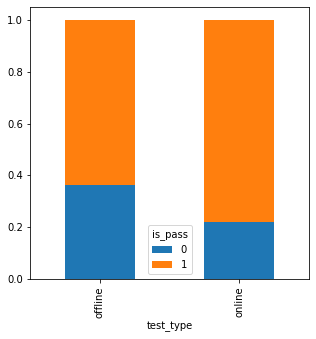

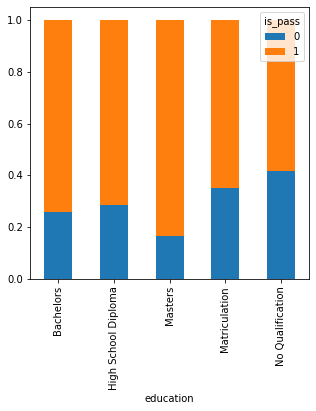

In [18]:
test_type=pd.crosstab(train['test_type'],train['is_pass'])
education=pd.crosstab(train['education'],train['is_pass'])
test_type.div(test_type.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(5,5))
plt.show()
education.div(education.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(5,5))
plt.show()

# Data Preprocessing 

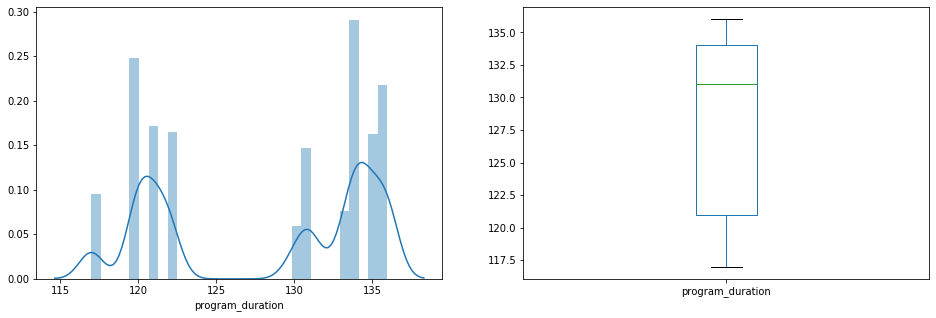

In [19]:
#Outlier Detection
plt.figure(1)
plt.subplot(121)
sns.distplot(train['program_duration']);

plt.subplot(122)
train['program_duration'].plot.box(figsize=(16,5))

plt.show()

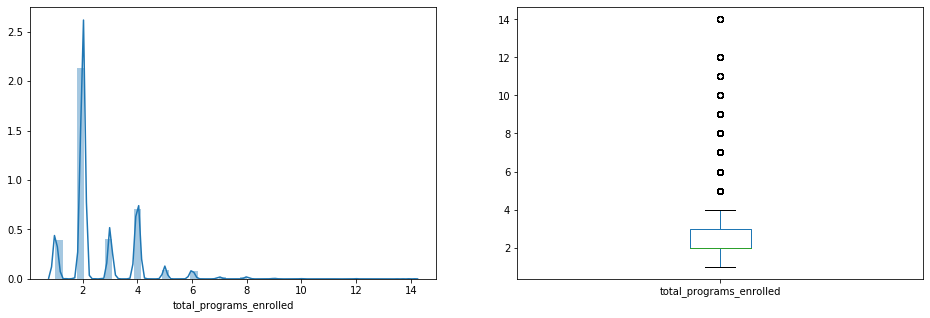

In [20]:
#Outlier Detection
plt.figure(1)
plt.subplot(121)
sns.distplot(train['total_programs_enrolled']);

plt.subplot(122)
train['total_programs_enrolled'].plot.box(figsize=(16,5))

plt.show()

In [21]:
#Getting the median value for Q2,Q4
print(train['total_programs_enrolled'].quantile(0.50)) 
print(train['total_programs_enrolled'].quantile(0.95)) 

2.0
5.0


In [22]:
#Outlier Removal via Media Imputation
train['total_programs_enrolled'] = np.where(train['total_programs_enrolled'] > 4.0,2.0,train['total_programs_enrolled'])

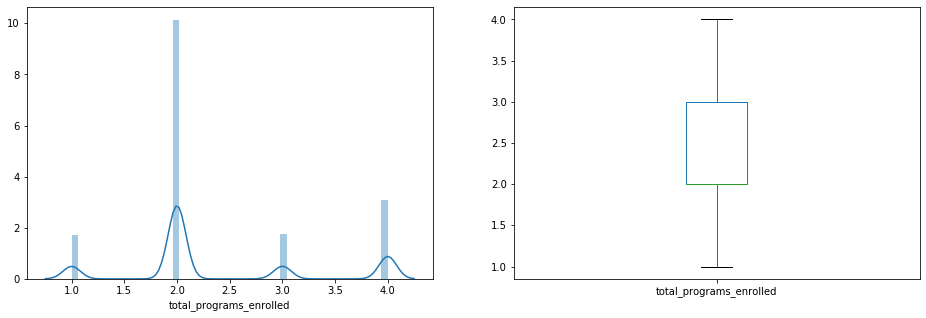

In [23]:
#checking for Outlier post cleaning
plt.figure(1)
plt.subplot(121)
sns.distplot(train['total_programs_enrolled']);

plt.subplot(122)
train['total_programs_enrolled'].plot.box(figsize=(16,5))

plt.show()


In [24]:
#Missing Values
train.isna().sum()

id                               0
program_id                       0
program_type                     0
program_duration                 0
test_id                          0
test_type                        0
difficulty_level                 0
trainee_id                       0
gender                           0
education                        0
city_tier                        0
age                          27729
total_programs_enrolled          0
is_handicapped                   0
trainee_engagement_rating       77
is_pass                          0
dtype: int64

In [25]:
#missing values imputation
train['age'].fillna(train['age'].mode()[0],inplace=True)
train['trainee_engagement_rating'].fillna(train['trainee_engagement_rating'].mode()[0],inplace=True)

In [26]:
train.isna().sum()

id                           0
program_id                   0
program_type                 0
program_duration             0
test_id                      0
test_type                    0
difficulty_level             0
trainee_id                   0
gender                       0
education                    0
city_tier                    0
age                          0
total_programs_enrolled      0
is_handicapped               0
trainee_engagement_rating    0
is_pass                      0
dtype: int64

In [27]:
test=pd.read_csv("test_wF0Ps6O.csv")

In [28]:
test.head()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating
0,1626_45,T_1,T,131,45,offline,intermediate,1626,F,Matriculation,3,46.0,2,N,4.0
1,11020_130,Y_3,Y,135,130,online,easy,11020,M,Bachelors,3,NaN,4,N,4.0
2,12652_146,Y_2,Y,120,146,online,easy,12652,M,Matriculation,3,NaN,2,N,3.0
3,7038_72,V_4,V,122,72,offline,vary hard,7038,F,High School Diploma,1,NaN,2,N,2.0
4,888_71,V_4,V,122,71,offline,intermediate,888,F,Matriculation,3,NaN,2,N,2.0


In [29]:
test.isna().sum()

id                               0
program_id                       0
program_type                     0
program_duration                 0
test_id                          0
test_type                        0
difficulty_level                 0
trainee_id                       0
gender                           0
education                        0
city_tier                        0
age                          11791
total_programs_enrolled          0
is_handicapped                   0
trainee_engagement_rating       31
dtype: int64

In [30]:
test['age'].fillna(test['age'].mode()[0],inplace=True)
test['trainee_engagement_rating'].fillna(test['trainee_engagement_rating'].mode()[0],inplace=True)

In [31]:
test.isna().sum()

id                           0
program_id                   0
program_type                 0
program_duration             0
test_id                      0
test_type                    0
difficulty_level             0
trainee_id                   0
gender                       0
education                    0
city_tier                    0
age                          0
total_programs_enrolled      0
is_handicapped               0
trainee_engagement_rating    0
dtype: int64

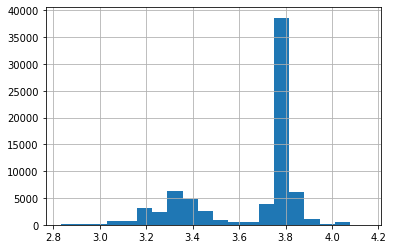

In [32]:
train['age_log'] = np.log(train['age'])
train['age_log'].hist(bins=20)

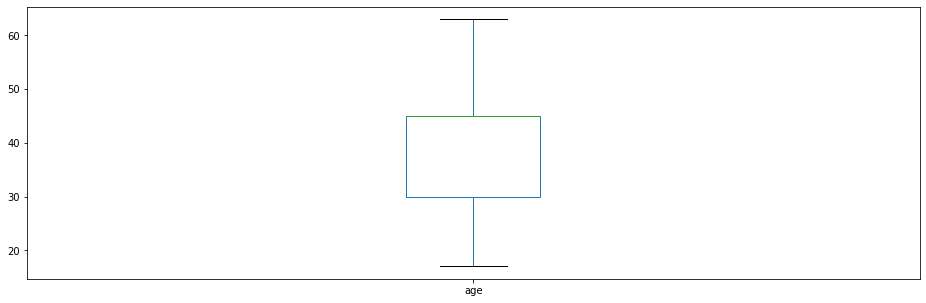

In [33]:
train['age'].plot.box(figsize=(16,5))

plt.show()

# ML Model

In [34]:
y=train.is_pass

In [35]:
X=train.drop(['is_pass'],axis=1,inplace=True)

In [36]:
X=pd.DataFrame(train)

In [37]:
X.head()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,age_log
0,9389_150,Y_1,Y,136,150,offline,intermediate,9389,M,Matriculation,3,24.0,2.0,N,1.0,3.178054
1,16523_44,T_1,T,131,44,offline,easy,16523,F,High School Diploma,4,26.0,2.0,N,3.0,3.258097
2,13987_178,Z_2,Z,120,178,online,easy,13987,M,Matriculation,1,40.0,1.0,N,2.0,3.688879
3,13158_32,T_2,T,117,32,offline,easy,13158,F,Matriculation,3,45.0,4.0,N,1.0,3.806662
4,10591_84,V_3,V,131,84,offline,intermediate,10591,F,High School Diploma,1,42.0,2.0,N,4.0,3.737670


In [38]:
X.drop(['id'],axis=1,inplace=True)
test_id=test.id

In [39]:
test.drop(['id'],axis=1,inplace=True)

In [40]:
X1=X.copy()
train1=train.copy()
test1=test.copy()
#Getting Dummies values to balance the columns
X=pd.get_dummies(X)



In [41]:
train=pd.get_dummies(train)

In [42]:
test=pd.get_dummies(test)

In [43]:
#test Train Split
from sklearn.model_selection import train_test_split

In [44]:
#Train Test taken in 80-20 ratio
x_train,x_cv,y_train,y_cv=train_test_split(X,y,test_size=0.2)

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [46]:
x_train.isna().sum()

program_duration                 0
test_id                          0
trainee_id                       0
city_tier                        0
age                              0
total_programs_enrolled          0
trainee_engagement_rating        0
age_log                          0
program_id_S_1                   0
program_id_S_2                   0
program_id_T_1                   0
program_id_T_2                   0
program_id_T_3                   0
program_id_T_4                   0
program_id_U_1                   0
program_id_U_2                   0
program_id_V_1                   0
program_id_V_2                   0
program_id_V_3                   0
program_id_V_4                   0
program_id_X_1                   0
program_id_X_2                   0
program_id_X_3                   0
program_id_Y_1                   0
program_id_Y_2                   0
program_id_Y_3                   0
program_id_Y_4                   0
program_id_Z_1                   0
program_id_Z_2      

In [47]:
y_train.isna().sum()

0

# Logistic Regression

In [48]:
model=LogisticRegression()
model.fit(x_train,y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
pred_cv=model.predict(x_cv)

In [50]:
accuracy_score(y_cv,pred_cv)

0.7164046479835954

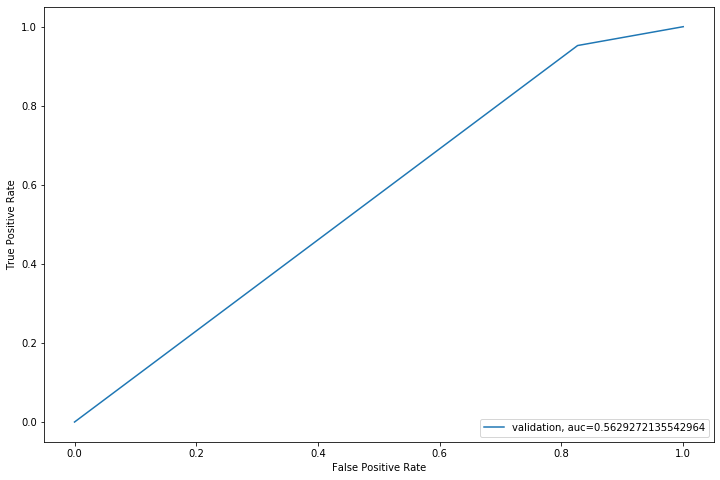

In [51]:
fpr, tpr, _ = roc_curve(y_cv,  pred_cv)
auc = roc_auc_score(y_cv,  pred_cv)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

# Random Forest Classifier

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
clf=RandomForestClassifier(n_estimators=100)

In [54]:
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [55]:
pred_clf=clf.predict(x_cv)

In [56]:
accuracy_score(y_cv,pred_clf)

0.7408065618591935

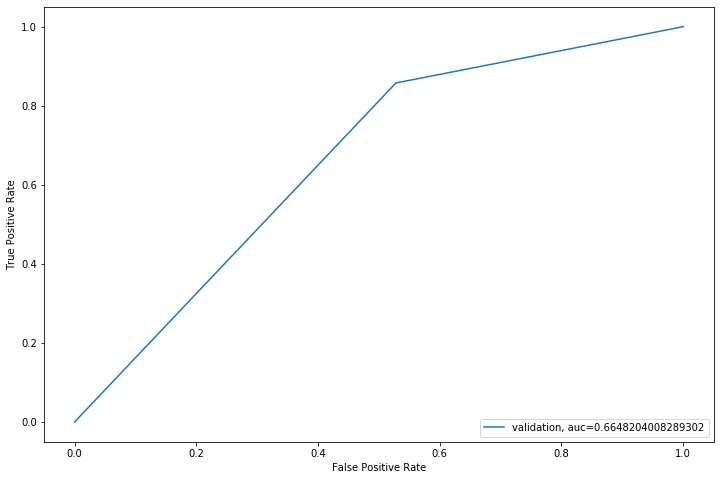

In [57]:
fpr, tpr, _ = roc_curve(y_cv,  pred_clf)
auc = roc_auc_score(y_cv,  pred_clf)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

# Feature Selection using RandomForest

In [58]:
feature_imp=pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

trainee_id                       0.264465
test_id                          0.166590
age                              0.092597
age_log                          0.092262
trainee_engagement_rating        0.074842
city_tier                        0.071200
total_programs_enrolled          0.046738
education_Matriculation          0.012995
education_High School Diploma    0.012628
program_duration                 0.012562
gender_F                         0.011967
gender_M                         0.011745
test_type_online                 0.010640
education_Bachelors              0.010248
test_type_offline                0.009940
is_handicapped_N                 0.008541
is_handicapped_Y                 0.008523
difficulty_level_easy            0.007376
difficulty_level_intermediate    0.006742
program_type_V                   0.005783
difficulty_level_vary hard       0.005123
difficulty_level_hard            0.004633
program_type_U                   0.004387
program_id_T_1                   0

No handles with labels found to put in legend.


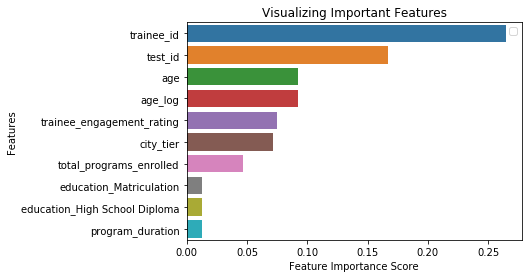

In [59]:
feature_imp1=feature_imp.iloc[:10]
sns.barplot(x=feature_imp1, y=feature_imp1.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [60]:
#using the top most features for better Accuracy 
X=X[['trainee_id','test_id','age','trainee_engagement_rating','city_tier','total_programs_enrolled','education_Matriculation','program_duration']]


In [61]:
X.size

585176

In [62]:
test=test[['trainee_id','test_id','age','trainee_engagement_rating','city_tier','total_programs_enrolled','education_Matriculation','program_duration']]

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [64]:
model=LogisticRegression()
model.fit(X_train,y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
pred_cv1=model.predict(X_test)

In [66]:
accuracy_score(y_test,pred_cv1)

0.6973798131692869

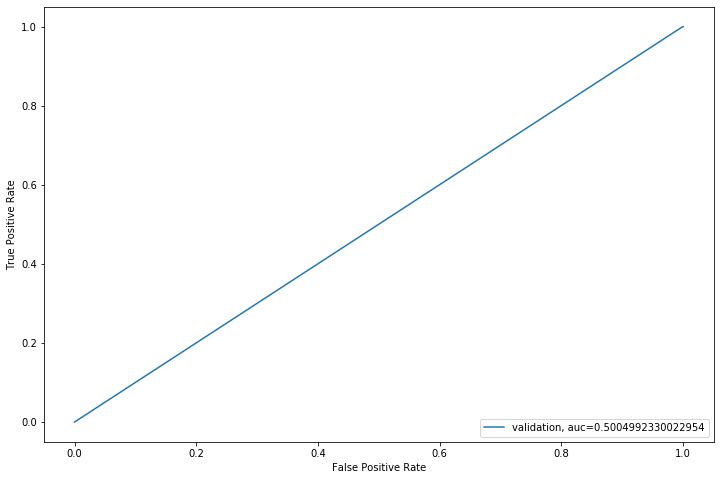

In [67]:
fpr, tpr, _ = roc_curve(y_test,  pred_cv1)
auc = roc_auc_score(y_test,  pred_cv1)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

# XGBoost Classifier

In [68]:
from xgboost import XGBClassifier

In [69]:
from sklearn.model_selection import StratifiedKFold
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
    
     model = XGBClassifier(n_estimators=50, max_depth=4)
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = roc_auc_score(yvl,pred_test)
     print('ROC AUC score',score)
     i+=1
predtest=model.predict(test)


1 of kfold 5
ROC AUC score 0.5977020710375551

2 of kfold 5
ROC AUC score 0.6027193043908523

3 of kfold 5
ROC AUC score 0.5998537134326598

4 of kfold 5
ROC AUC score 0.6007115280865445

5 of kfold 5
ROC AUC score 0.5994076930502663


# Decision Tree

In [70]:
from sklearn import tree
from sklearn.model_selection import StratifiedKFold
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
    
     model = tree.DecisionTreeClassifier(random_state=1)
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = roc_auc_score(yvl,pred_test)
     print('ROC AUC score',score)
     i+=1
predtest=model.predict(test)


1 of kfold 5
ROC AUC score 0.6576325305924667

2 of kfold 5
ROC AUC score 0.6586576910059401

3 of kfold 5
ROC AUC score 0.6590338909751778

4 of kfold 5
ROC AUC score 0.665788656070448

5 of kfold 5
ROC AUC score 0.6570011710337551


# Saving the Test file 

In [71]:
submission=pd.DataFrame(index=test_id)
submission['is_pass']=predtest

In [72]:
submission.is_pass.head()

id
1626_45      0
11020_130    1
12652_146    0
7038_72      0
888_71       0
Name: is_pass, dtype: int64

In [73]:
pd.DataFrame(submission, columns=['ID','is_pass']).to_csv('DecisionTree.csv')

# Using GridSearch CV

In [74]:
X1=pd.get_dummies(X1)

In [75]:
x_train, x_cv, y_train, y_cv = train_test_split(X1,y, test_size =0.3, random_state=1)

In [76]:
from sklearn.model_selection import GridSearchCV

In [77]:
paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}

In [78]:
grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)

In [79]:
grid_search.fit(x_train,y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=1,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_gri

In [80]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=17, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=61,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [81]:

i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
    
     model = RandomForestClassifier(random_state=1, max_depth=3, n_estimators=41)
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = roc_auc_score(yvl,pred_test)
     print('ROC AUC score',score)
     i+=1
predtest=model.predict(test)


1 of kfold 5
ROC AUC score 0.5

2 of kfold 5
ROC AUC score 0.5

3 of kfold 5
ROC AUC score 0.5

4 of kfold 5
ROC AUC score 0.5

5 of kfold 5
ROC AUC score 0.5


In [82]:
submission=pd.DataFrame(index=test_id)
submission['is_pass']=predtest

In [83]:
pd.DataFrame(submission, columns=['ID','is_pass']).to_csv('GridSearch.csv')